In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
data_bid = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv") #features
valid = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/validation.csv") #Validation set 

#### Randomise the data of the training set

In [4]:
data_bid= data_bid.sample(frac = 1,random_state = 10).reset_index(drop=True)

In [5]:
#Drop not recommended in the paper
data_bid = data_bid.drop(['bidid','userid','logtype','url','urlid','bidprice','payprice','keypage'],1)

### Used to change the display in panda

In [6]:
#pd.set_option('display.max_columns', 999)
#pd.reset_option('display.max_columns')

In [7]:
data_type = data_bid.columns.to_series().groupby(data_bid.dtypes).groups
data_type

{dtype('int64'): ['click',
  'weekday',
  'hour',
  'region',
  'city',
  'slotwidth',
  'slotheight',
  'slotprice',
  'advertiser'],
 dtype('O'): ['useragent',
  'IP',
  'adexchange',
  'domain',
  'slotid',
  'slotvisibility',
  'slotformat',
  'creative',
  'usertag']}

In [8]:
data_1 = data_bid.sample(frac = 0.1, random_state=3).reset_index(drop=True)

In [9]:
feat_num = data_bid.sample(frac = 0.2,random_state = 3).reset_index(drop=True)
feat_num= feat_num.select_dtypes(include= [np.number])

In [10]:
data_clicked = data_bid[data_bid.click == 1]

In [11]:
graph_df

NameError: name 'graph_df' is not defined

In [12]:
data_clicked.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,advertiser
count,2034.0,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000
mean,1.0,2.907080,14.201082,147.781219,152.887414,558.304818,173.038348,31.358407,2836.491150
std,0.0,1.911911,6.715450,102.787226,104.175613,314.657896,126.972432,42.686446,784.869524
min,1.0,0.000000,0.000000,0.000000,0.000000,120.000000,50.000000,0.000000,1458.000000
25%,1.0,1.000000,11.000000,79.000000,79.000000,300.000000,90.000000,0.000000,2261.000000
50%,1.0,3.000000,16.000000,146.000000,148.000000,336.000000,90.000000,5.000000,3358.000000
75%,1.0,5.000000,19.000000,216.000000,222.000000,960.000000,250.000000,70.000000,3427.000000
max,1.0,6.000000,23.000000,394.000000,399.000000,1000.000000,600.000000,280.000000,3476.000000


#### Basic statistics

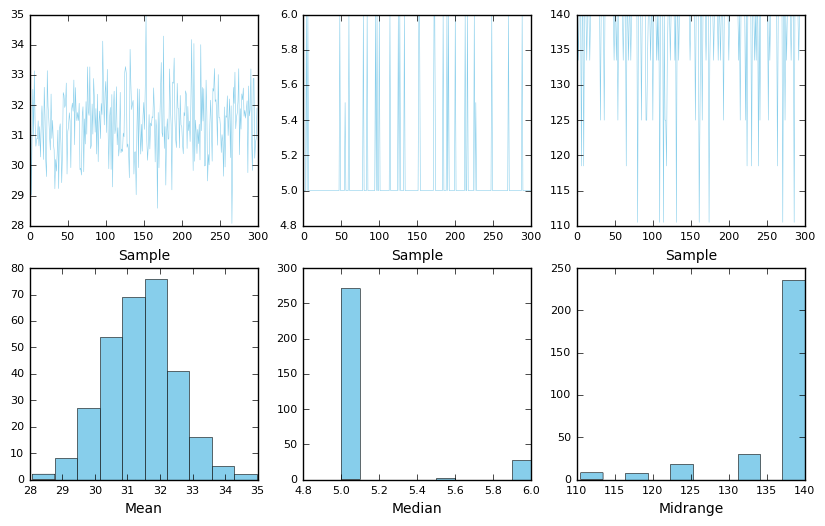

In [13]:
#Mean slotprice at 32 to ensure it must be higher than the reserve bid 
from pandas.tools.plotting import bootstrap_plot

bootstrap_plot(data_clicked.slotprice, size =800, samples =300, color ='skyblue', alpha =1, linewidth=0.4).set_size_inches(10,6) #Size = batch size , .tight_layout()


#
#Save image
plt.savefig('bootstrap_plot_slotprice.jpg',bbox_inches='tight')

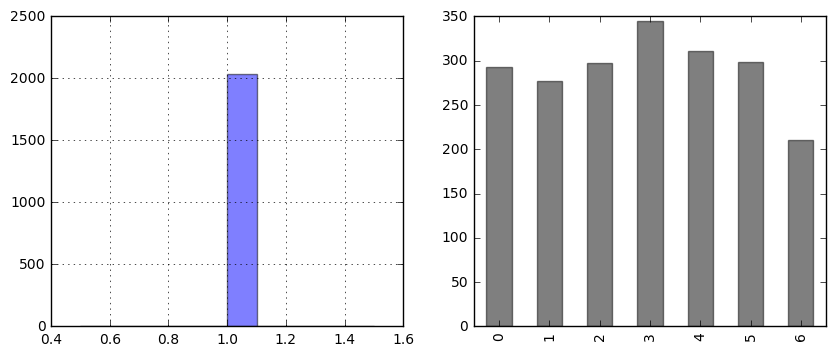

In [14]:
#Clicks and weekday
fig, axes = plt.subplots(ncols = 2, figsize=(10,4))

data_clicked['click'].hist(color='blue', alpha =0.5 , ax=axes[0], bins =10 )
data_clicked.weekday.value_counts(sort = False).plot.bar(color= 'k', alpha = 0.5, ax = axes[1])

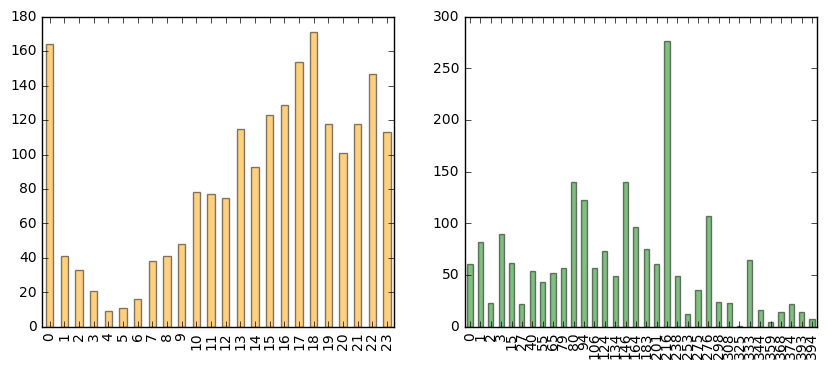

In [15]:
# Hours and region
fig2, axes = plt.subplots(ncols = 2, figsize=(10,4))
data_clicked.hour.value_counts(sort = False).plot.bar(color= 'orange', alpha = 0.5, ax = axes[0])
data_clicked.region.value_counts(sort = False).plot.bar(color= 'g', alpha = 0.5, ax = axes[1])

1      82
217    64
0      61
79     57
219    52
277    43
85     36
Name: city, dtype: int64


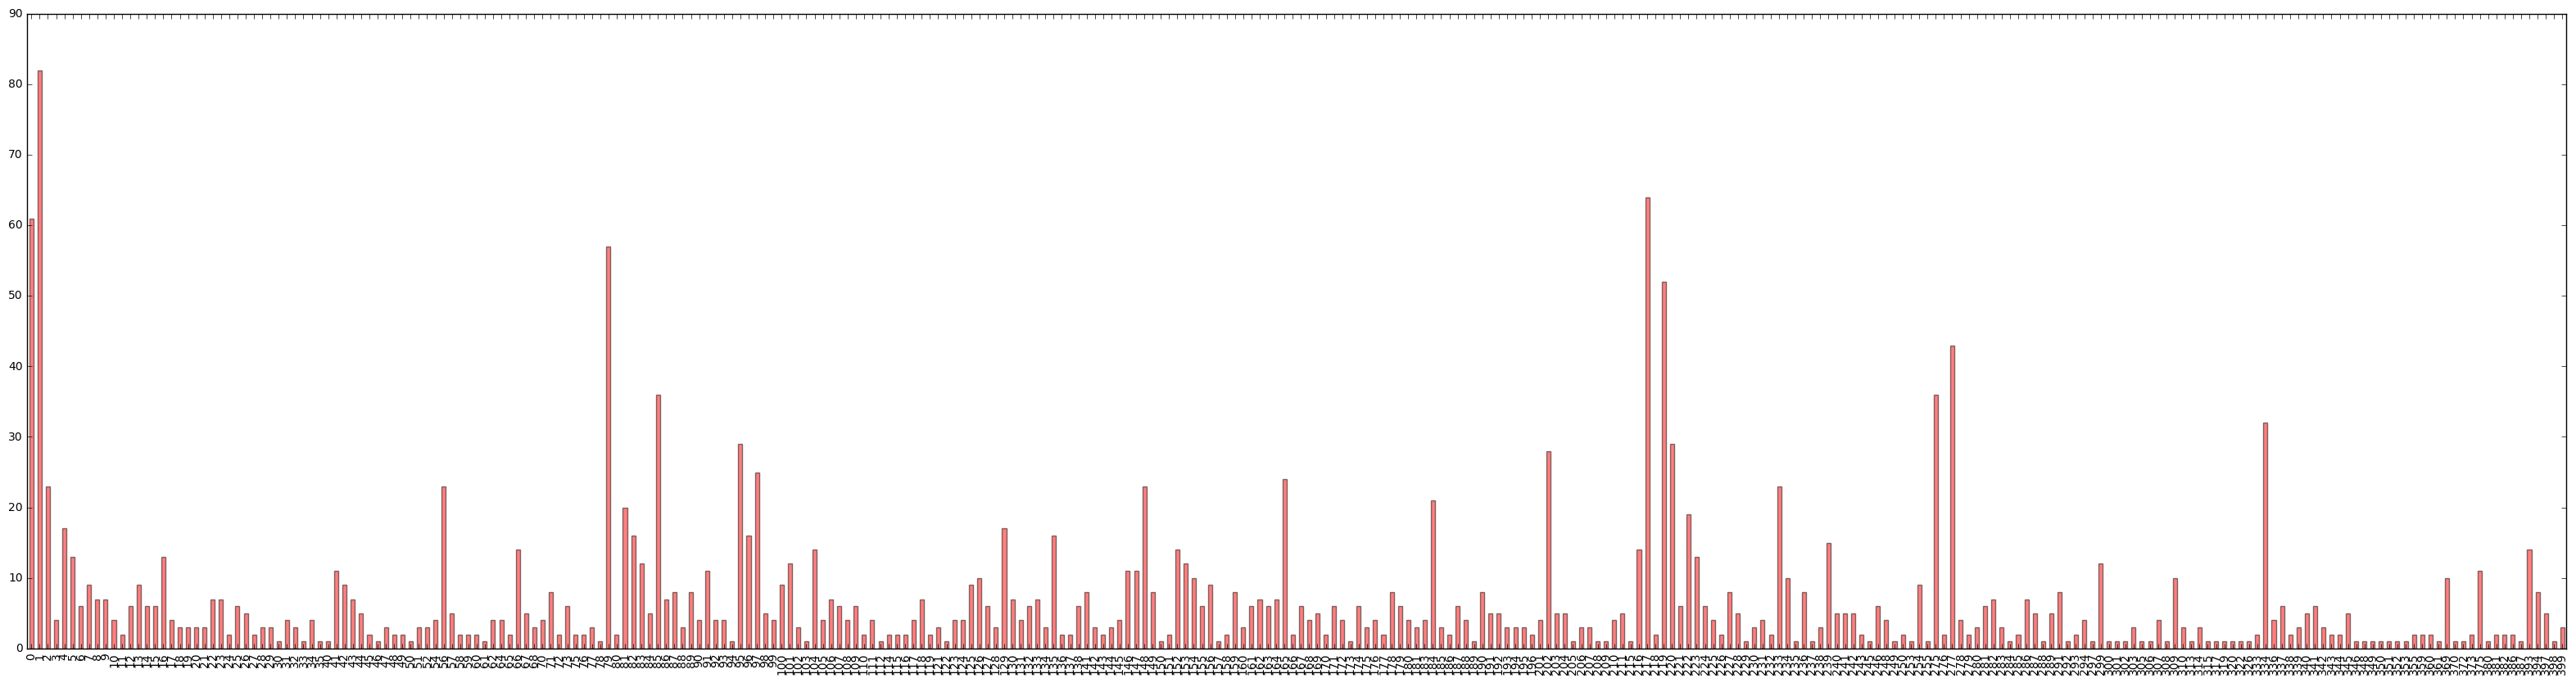

In [16]:
#Cities
data_clicked.city.value_counts(sort = False).plot.bar(color= 'r', alpha = 0.5, figsize=(40,10))
print (data_clicked.city.value_counts(sort = True).head(7))

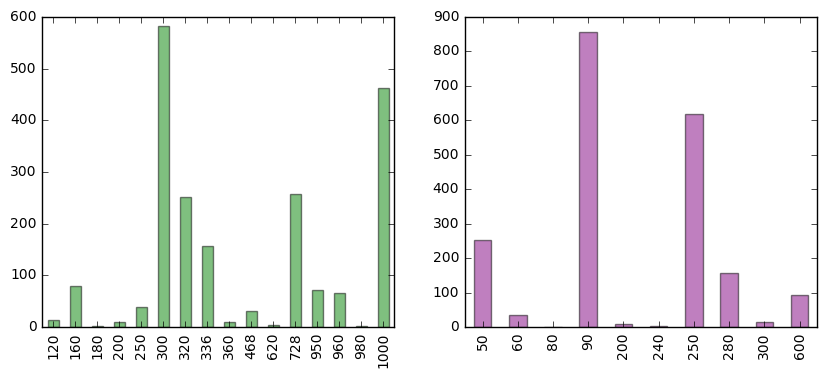

In [17]:
#slotwidth and slotheight
fig3, axes = plt.subplots(ncols = 2, figsize=(10,4))
data_clicked.slotwidth.value_counts(sort = False).plot.bar(color= 'g', alpha = 0.5, ax = axes[0])
data_clicked.slotheight.value_counts(sort = False).plot.bar(color= 'purple', alpha = 0.5, ax = axes[1])

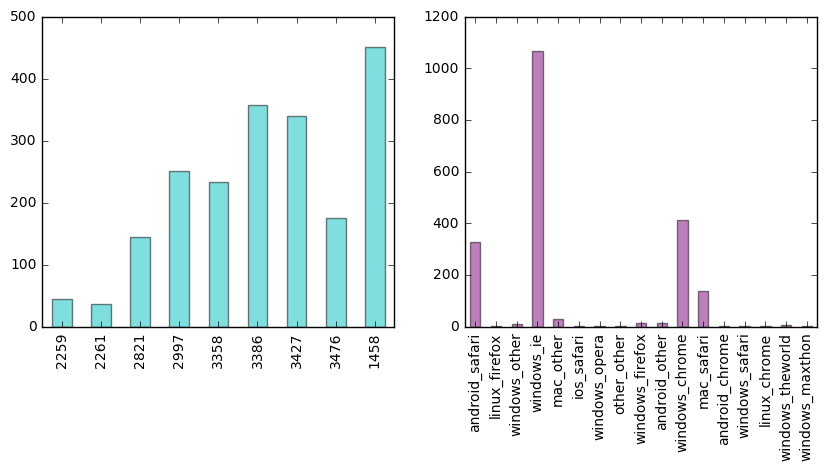

In [18]:
#advertiser and useragent 
fig4, axes = plt.subplots(ncols = 2, figsize=(10,4))
data_clicked.advertiser.value_counts(sort = False).plot.bar(color= 'c', alpha = 0.5, ax = axes[0])
data_clicked.useragent.value_counts(sort = False).plot.bar(color= 'purple', alpha = 0.5, ax = axes[1])

0      683
5      358
70     341
80     110
6      101
50      98
20      57
30      24
31      23
148     16
Name: slotprice, dtype: int64


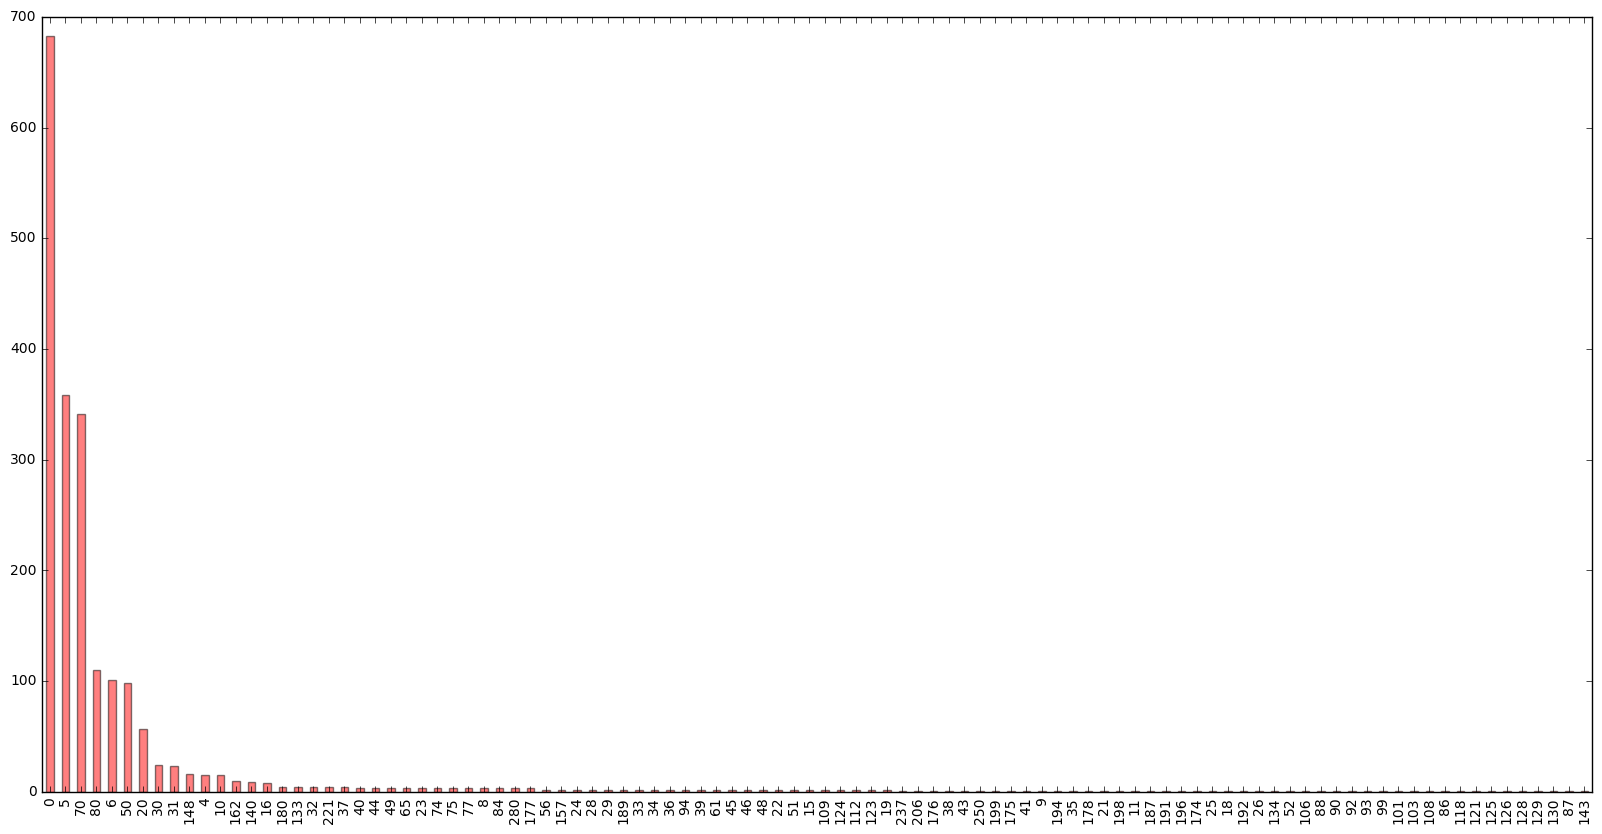

In [19]:
#Slotprice 
data_clicked.slotprice.value_counts(sort = True).head(100).plot.bar(color= 'r', alpha = 0.5, figsize=(20,10))
print (data_clicked.slotprice.value_counts(sort = True).head(10))

113.106.102.*    14
117.136.24.*      8
14.18.203.*       5
221.2.103.*       4
119.4.252.*       3
220.243.7.*       3
61.185.133.*      3
211.138.237.*     3
202.99.173.*      3
218.22.119.*      2
Name: IP, dtype: int64


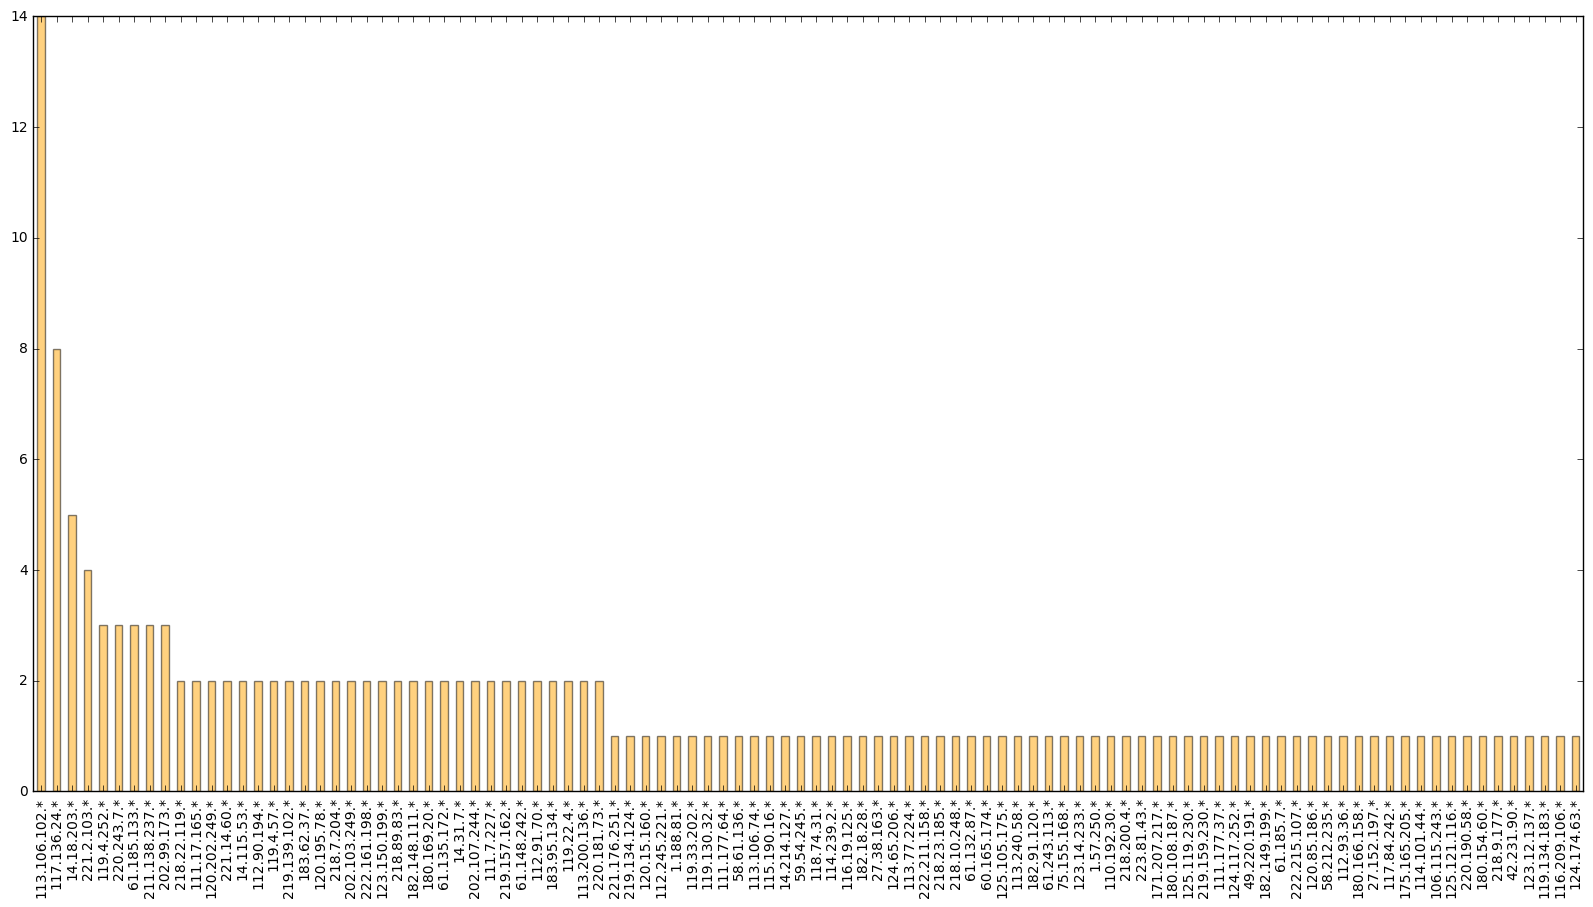

In [20]:
#IP
data_clicked.IP.value_counts(sort = True).head(100).plot.bar(color= 'orange', alpha = 0.5, figsize=(20,10))
print (data_clicked.IP.value_counts(sort = True).head(10))

null                        321
5F1RQS9rg5scFsf             183
ersbQv1RdoTy1m58uG           74
3FKElpuEMusyJqKbuKz          65
3FF-e59aG5syJqKbuKz          62
trqRTuMvjTN7X9KbuKz          46
eA1XTupSMZq81YT9UDaWvpdh     44
31xSTvprdN1RFt               37
31drTvprdN1RFt               30
5F97t5E0BTK7XhNrUMpENpn      30
Name: domain, dtype: int64


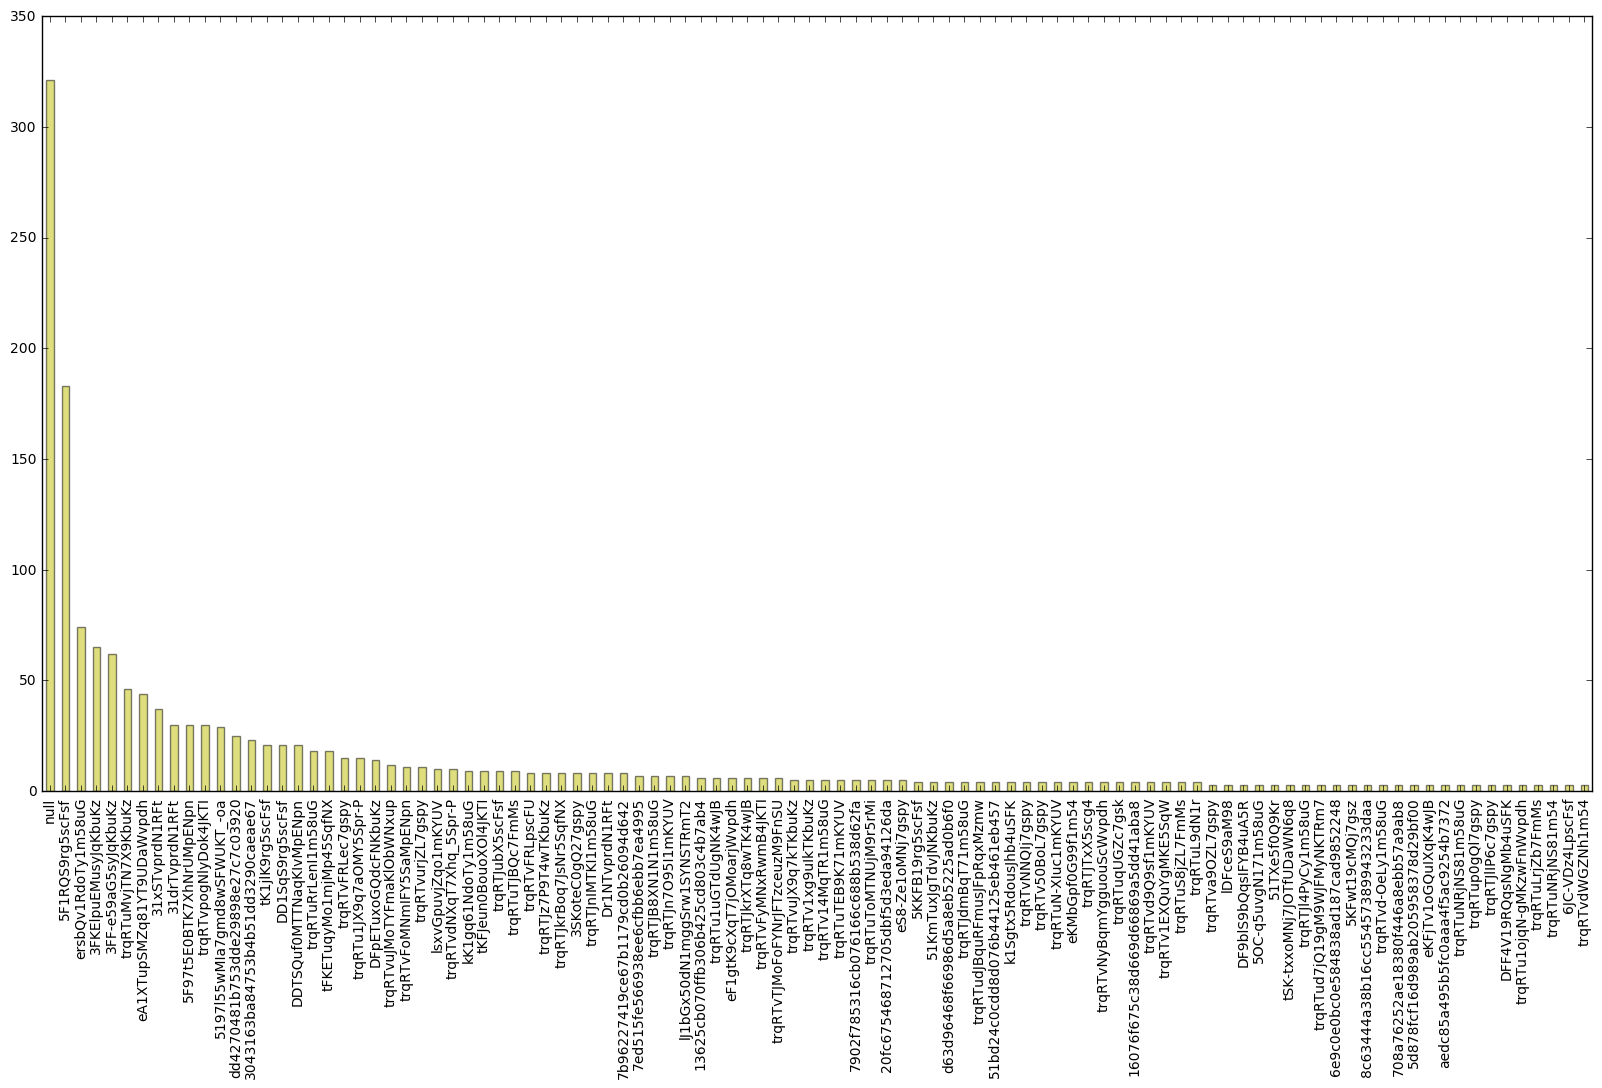

In [21]:
#Domain
data_clicked.domain.value_counts(sort = True).head(100).plot.bar(color= 'y', alpha = 0.5, figsize=(20,10))
print (data_clicked.domain.value_counts(sort = True).head(10))

ALLINONE_F_Width1              247
1                              240
News_F_Width1                   82
mm_15191080_2147689_9068851     44
mm_10027070_118039_9659846      37
Ent_F_Width1                    34
tips_F_Width1                   33
mm_13087935_2078460_8374314     29
News_F_Rectangle                27
tips_F_Rectangle1               19
Name: slotid, dtype: int64


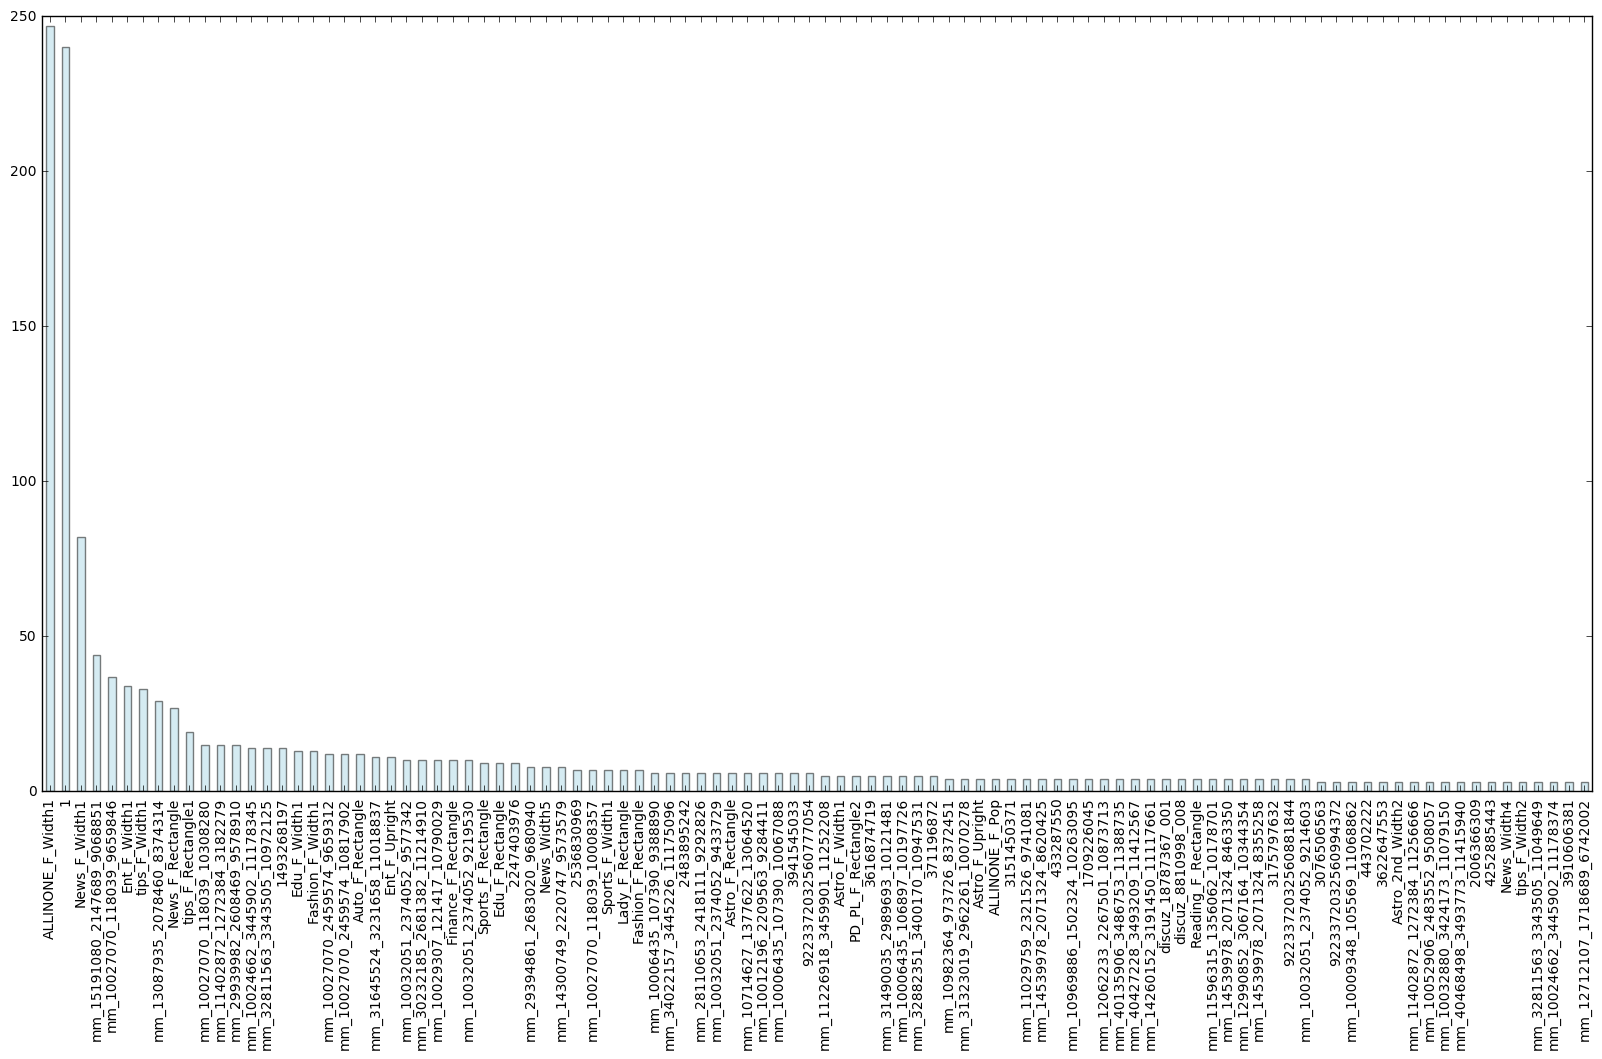

In [22]:
#slotid
data_clicked.slotid.value_counts(sort = True).head(100).plot.bar(color= 'lightblue', alpha = 0.5, figsize=(20,10))
print (data_clicked.slotid.value_counts(sort = True).head(10))

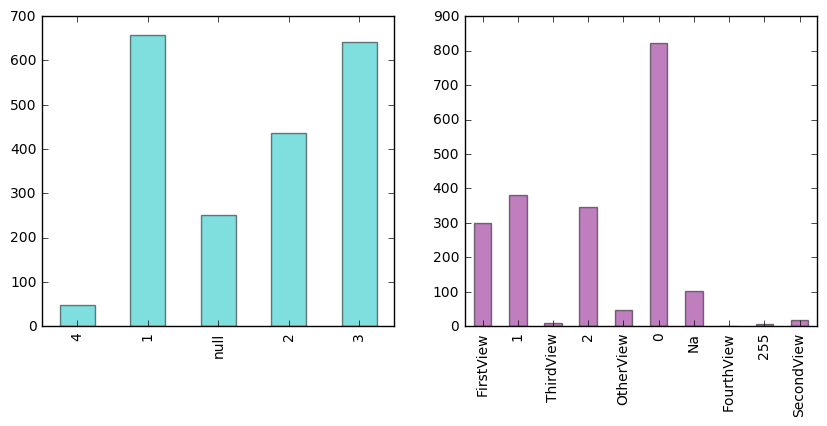

In [23]:
#adexchange and slot visibility
fig5, axes = plt.subplots(ncols = 2, figsize=(10,4))
data_clicked.adexchange.value_counts(sort = False).plot.bar(color= 'c', alpha = 0.5, ax = axes[0])
data_clicked.slotvisibility.value_counts(sort = False).head(100).plot.bar(color= 'purple', alpha = 0.5, ax = axes[1])

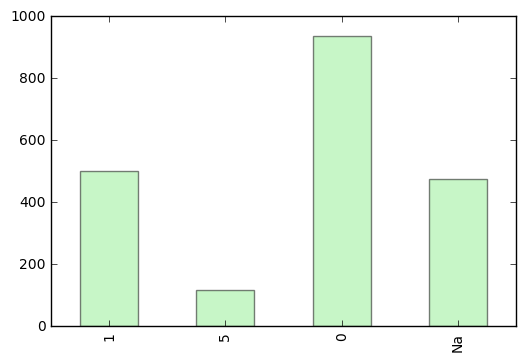

In [24]:
#slot format
data_clicked.slotformat.value_counts(sort = False).plot.bar(color= 'lightgreen', alpha = 0.5)


44966cc8da1ed40c95d59e863c8c75f0    171
11908                               155
832b91d59d0cb5731431653204a76c0e    128
48f2e9ba15708c0146bda5e1dd653caa    120
77819d3e0b3467fe5c7b16d68ad923a1     84
86c2543527c86a893d4d4f68810a0416     84
911b2d84826786018761e8c0b0a3a60c     76
449a22cd91d9042eda3d3a1b89a22ea8     72
c46090c887c257b61ab1fa11baee91d8     71
0cd33fcb336655841d3e1441b915748d     62
Name: creative, dtype: int64


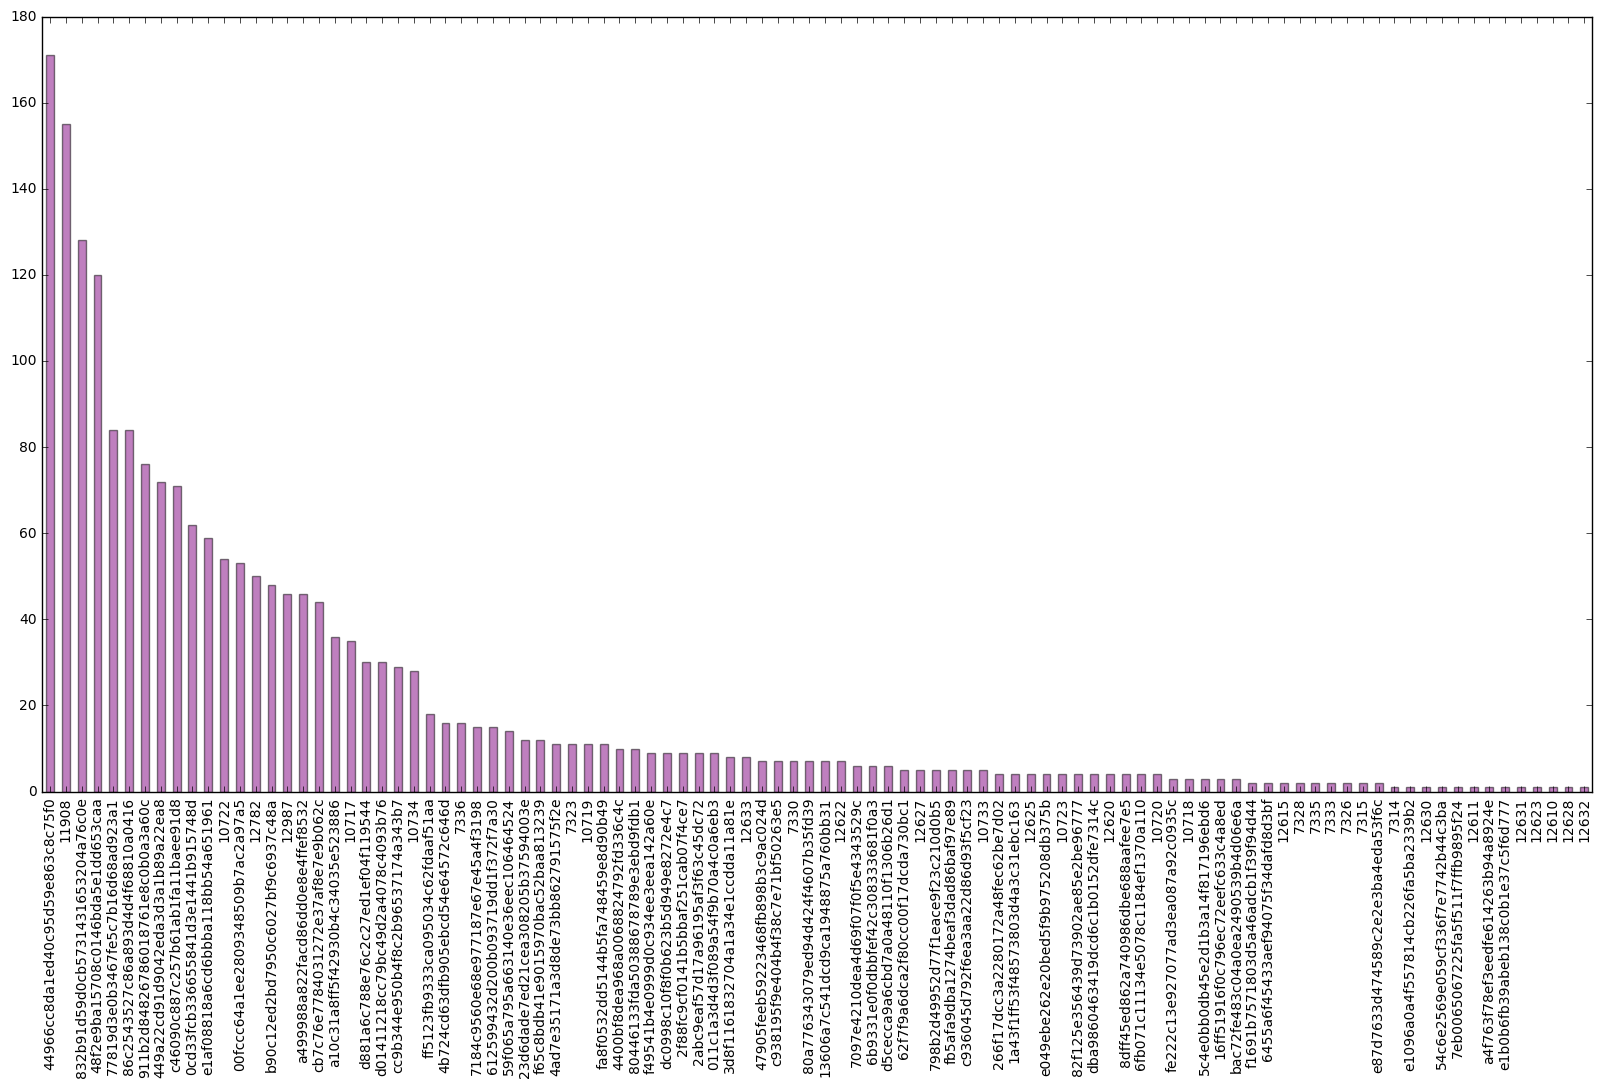

In [25]:
#Creative top 100 
data_clicked.creative.value_counts(sort = True).head(100).plot.bar(color= 'purple', alpha = 0.5, figsize=(20,10))
print (data_clicked.creative.value_counts(sort = True).head(10))

null           613
11278,10111     64
10063           43
13042,10110     41
10684           24
13866           18
10006           16
10006,10110     12
10006,10063      9
10024            8
Name: usertag, dtype: int64


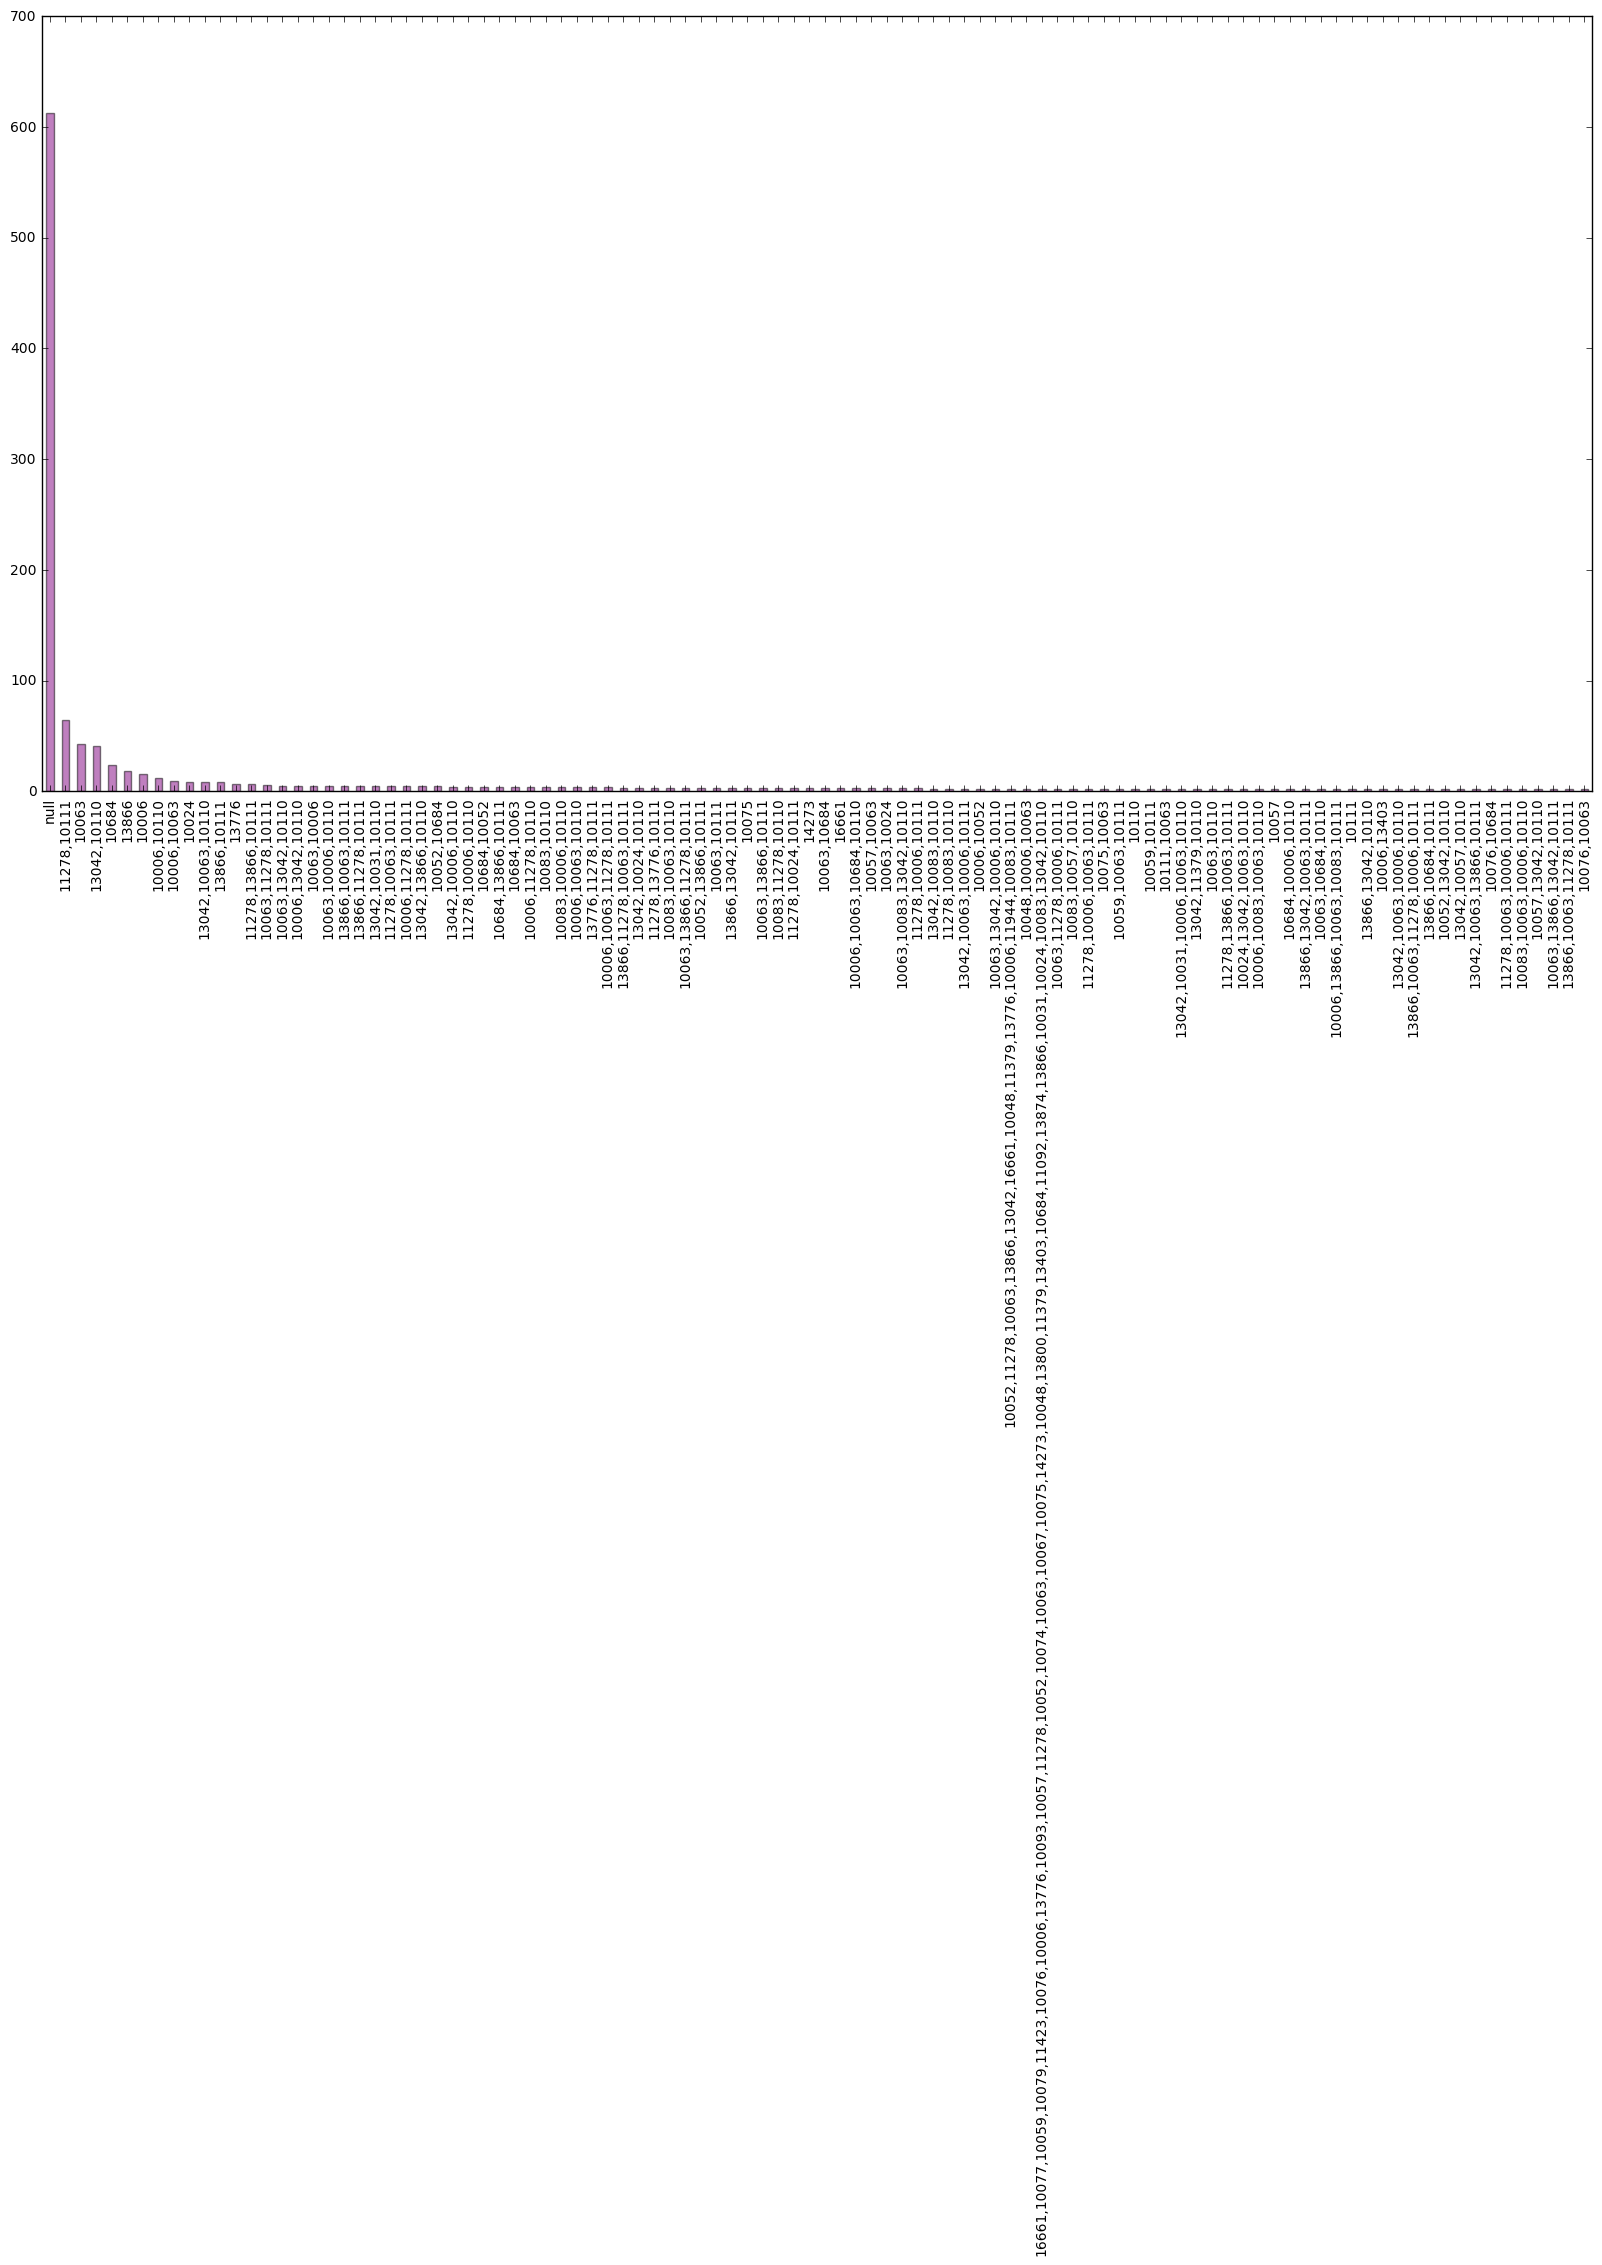

In [26]:
#Usertag top 100 
data_clicked.usertag.value_counts(sort = True).head(100).plot.bar(color= 'purple', alpha = 0.5, figsize=(20,10))
print (data_clicked.usertag.value_counts(sort = True).head(10))

In [27]:
len(data_clicked.city.unique())

308

#### Normalised plots 

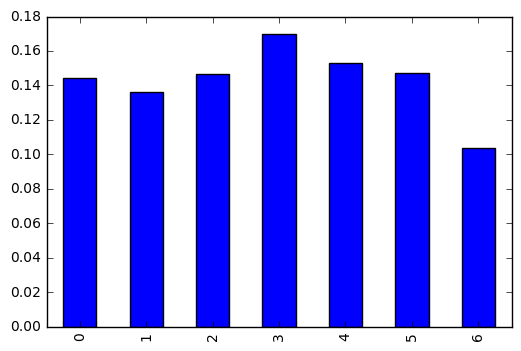

In [28]:
#Normalised plots - example
data_clicked.weekday.value_counts(normalize = True, sort = False).plot.bar()

In [29]:
radviz_s = data_clicked[['weekday','hour','city','useragent']]

In [30]:
list(data_clicked.columns)

['click',
 'weekday',
 'hour',
 'useragent',
 'IP',
 'region',
 'city',
 'adexchange',
 'domain',
 'slotid',
 'slotwidth',
 'slotheight',
 'slotvisibility',
 'slotformat',
 'slotprice',
 'creative',
 'advertiser',
 'usertag']

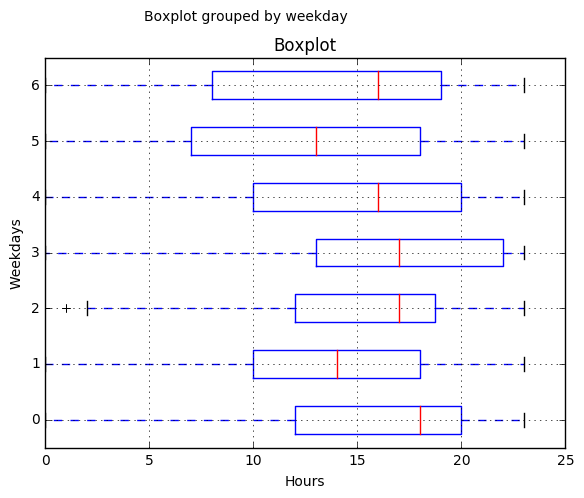

In [38]:
ax = data_clicked.boxplot('hour', vert=False, figsize=(8,6) , by='weekday')
plt.subplots_adjust(bottom=0.25)
plt.title('Boxplots')
plt.subplots_adjust(left=0.25)
ax.set_xlabel('Hours')
ax.set_ylabel('Weekdays')
ax.set_title('Boxplot')
#Save image
plt.savefig('Boxplot.jpg',bbox_inches='tight')

In [ ]:
feat_num.shape

In [ ]:
one_hot = pd.get_dummies(feat_num, columns = ['weekday','advertiser','hour','slotheight','slotwidth'])

In [ ]:
train_sc = sample_clicked.ix[:,1:]

In [ ]:
target_sc= sample_clicked['click']

In [ ]:
sample_clicked = data_bid[data_bid.click == 1].sample(frac = 1, random_state =3).reset_index(drop=True)
sample_clicked = sample_clicked.select_dtypes(include= [np.number])
sample_clicked

#### Label encoder for the advertisers testing

In [ ]:
le= LabelEncoder()

In [ ]:
le.fit(sample.advertiser)

In [ ]:
transformed = le.transform(sample.advertiser).tolist()

In [359]:
le.inverse_transform(transformed)

array([3427, 3476, 3427, ..., 2821, 3427, 3427], dtype=int64)

In [365]:
sample.advertiser.tolist()

In [416]:
#Sample without one_hot encode - might want to try min max scaler too
sample = feat_num
data1_dummies= pd.get_dummies(data_1, columns=['advertiser','weekday','useragent','adexchange','hour','slotformat','slotvisibility','slotwidth','slotheight','city','region'])

In [413]:
data1_dummies = data1_dummies.drop(['creative','IP','domain','slotid','usertag'],axis =1)

In [330]:
len(data_bid)

2697738

In [334]:
#Standard scaling- IF YOU SCALE TRAINNING REMEMBER TO ALSO SCALE VALIDATION

# Load the standard scaler
mm = MinMaxScaler()

# Compute the mean and standard deviation based on the training data/ need to change data
mm.fit(sample)

# Scale the training data to be of mean 0 and of unit variance
sample_mm = mm.transform(sample)

In [338]:
pd.DataFrame(sample_mm)

,0,1,2,3,4,5,6,7,8
0,0.0,0.333333,0.608696,0.870886,0.882206,0.954545,0.072727,0.066667,0.975719
1,0.0,0.166667,0.391304,0.101266,0.135338,0.204545,0.363636,0.166667,1.000000
2,0.0,0.666667,1.000000,0.268354,0.303258,0.204545,0.363636,0.223333,0.975719
3,0.0,0.000000,0.739130,0.546835,0.543860,0.204545,0.363636,0.000000,0.396928
4,0.0,0.000000,0.478261,0.546835,0.576441,0.690909,0.072727,0.223333,0.396928
5,0.0,0.666667,0.782609,0.313924,0.330827,0.690909,0.072727,0.196667,0.975719
6,0.0,0.333333,0.652174,0.602532,0.619048,0.954545,0.072727,0.100000,0.675421
7,0.0,0.000000,0.956522,0.068354,0.075188,0.954545,0.072727,0.100000,0.675421
8,0.0,1.000000,0.521739,0.640506,0.636591,0.147727,0.363636,0.016667,0.941526
9,0.0,0.166667,0.782609,0.268354,0.308271,0.954545,0.072727,0.000000,0.675421


In [332]:
sample.head()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,advertiser
0,0,2,14,344,352,960,90,20,3427
1,0,1,9,40,54,300,250,50,3476
2,0,4,23,106,121,300,250,67,3427
3,0,0,17,216,217,300,250,0,2259
4,0,0,11,216,230,728,90,67,2259


### Need a CTR calculator for a given set of impressions 

In [16]:
sample.shape[0]

539548

In [373]:
np.count_nonzero(sample.click.values)

197

In [19]:
def CTR_calc(data):
    Click_t_rate= "Click Through Rate= "+ str(round((np.count_nonzero(data.click.values)/data.shape[0])*100,4)) + ' %'
    return (Click_t_rate)

In [58]:
CTR_calc(sample)

'Click Through Rate= 0.074 %'

In [417]:
x_feat= data1_dummies.ix[:,1:] # might have different columns when one hot another sample
y_targets = data1_dummies['click']

In [418]:
X_train, X_test, y_train, y_test = train_test_split(x_feat, y_targets, test_size=0.2,random_state=4)

In [424]:
X_train.shape

(215819, 540)

In [425]:
y_train.shape

(215819,)

### Need to make a pCTR predictor

In [428]:
#Using random forest classifier to predict clicks
from sklearn.ensemble import RandomForestClassifier

In [429]:
clf = RandomForestClassifier(n_estimators=500,oob_score = True, random_state = 4)

In [431]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: '13678,10006,10110,10116'

In [404]:
clf_predict = clf.predict(X_test)

In [430]:
clf.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [406]:
X_train.columns

Index(['region', 'city', 'slotprice', 'advertiser_1458', 'advertiser_2259',
       'advertiser_2261', 'advertiser_2821', 'advertiser_2997',
       'advertiser_3358', 'advertiser_3386',
       ...
       'slotheight_100', 'slotheight_125', 'slotheight_150', 'slotheight_200',
       'slotheight_230', 'slotheight_240', 'slotheight_250', 'slotheight_280',
       'slotheight_300', 'slotheight_600'],
      dtype='object', length=132)

In [407]:
for feature, importance in zip(X_train.columns,clf.feature_importances_):
    print (feature, ":", importance)

region : 0.162583197489
city : 0.314323051323
slotprice : 0.0798173434418
advertiser_1458 : 0.012174041775
advertiser_2259 : 0.00121210159604
advertiser_2261 : 0.0011220368901
advertiser_2821 : 0.000691860865408
advertiser_2997 : 0.000159656297582
advertiser_3358 : 0.00806496909937
advertiser_3386 : 0.0132818483496
advertiser_3427 : 0.0116315716646
advertiser_3476 : 0.0104386957965
weekday_0 : 0.0122251128563
weekday_1 : 0.0133902262866
weekday_2 : 0.0142265596172
weekday_3 : 0.0156500573353
weekday_4 : 0.0119223314681
weekday_5 : 0.0147008013023
weekday_6 : 0.0126625475581
useragent_android_chrome : 1.26446095928e-05
useragent_android_firefox : 0.0
useragent_android_maxthon : 6.7305041188e-06
useragent_android_opera : 1.5775525157e-05
useragent_android_other : 0.00328455929436
useragent_android_safari : 0.00245197016754
useragent_android_sogou : 0.0
useragent_ios_safari : 5.21176132185e-05
useragent_linux_chrome : 1.37663099015e-05
useragent_linux_firefox : 2.43852887558e-06
useragent

In [73]:
clf_predict.shape

(107910,)

In [408]:
acc_df = pd.DataFrame([clf_predict.transpose(),y_test], index=['Predict','Test']).transpose()

In [409]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_predict, normalize=True, sample_weight=None)

0.99936984524140482

In [410]:
#Number of clicks 1 = actually predicted 
np.count_nonzero(clf_predict)

2

In [411]:
acc_df[acc_df.Predict==1]

,Predict,Test
687,1,0
16638,1,0


### Linear regression model test

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

### Accuracy score measure

In [ ]:
#Checks the accuracy score
from sklearn.metrics import accuracy_score


In [ ]:
#Use randomised search for hyper parameters

In [11]:
valid.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,250,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111"
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,50,FirstView,Na,118,11908,277,118,null,2997,null
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,90,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null


In [215]:
clf_predict

AttributeError: 'numpy.ndarray' object has no attribute 'count'